# Predicting the next five years of the fashion sustainability transparency index

### dataset:https://www.fashionrevolution.org/fashion-transparency-index/

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [2]:
file_path = '/work/index_report.csv'
df = pd.read_csv(file_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 92 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       17 non-null     object 
 1   Abercrombie & Fitch        17 non-null     float64
 2   Marks & Spencer            17 non-null     float64
 3   Aeropostale                17 non-null     float64
 4   Amazon                     17 non-null     float64
 5   American Eagle             17 non-null     float64
 6   Anthropologie              17 non-null     float64
 7   Armani                     17 non-null     float64
 8   TJ Maxx                    17 non-null     float64
 9   ASICS                      17 non-null     float64
 10  ASOS                       17 non-null     float64
 11  Triumph                    17 non-null     float64
 12  Bershka                    17 non-null     float64
 13  Bottega Veneta             17 non-null     float64
 

In [4]:
df.head(16)

,Year,Abercrombie & Fitch,Marks & Spencer,Aeropostale,Amazon,American Eagle,Anthropologie,Armani,TJ Maxx,ASICS,...,Michael Kors,Under Armour,Uniqlo,United Colors of Benetton,Urban Outfitters,Victoria's Secret,Burlington,Wrangler,Zalando,Zara
0,2022 FINAL SCORE,46.750,108.750,6.500,77.250,45.750,34.750,43.500,31.750,110.250,...,54.750,123.500,158.000,34.750,44.750,31.750,111.250,110.000,107.750,83.8900
1,2022 FINAL PERCENTAGE,0.187,0.435,0.026,0.309,0.183,0.139,0.174,0.127,0.441,...,0.219,0.494,0.632,0.139,0.179,0.127,0.445,0.440,0.431,0.3356
2,2021 Final scores,49.750,120.250,8.500,68.250,38.750,39.250,34.750,32.500,122.250,...,53.750,105.250,149.250,39.250,54.000,36.500,85.500,112.250,89.500,79.6300
3,2021 FINAL PERCENTAGES,0.199,0.481,0.034,0.273,0.155,0.157,0.139,0.130,0.489,...,0.215,0.421,0.597,0.157,0.216,0.146,0.342,0.449,0.358,0.3185
4,% change in score 2020-2022,-0.012,-0.046,-0.008,0.036,0.028,-0.018,0.035,-0.003,-0.048,...,0.004,0.073,0.035,-0.018,-0.037,-0.019,0.103,-0.009,0.073,0.0171
5,2020 Final scores,62.000,149.000,10.000,63.500,43.000,50.500,22.000,38.000,114.500,...,73.000,99.000,136.500,50.500,53.000,36.000,146.500,97.500,110.500,83.8100
6,2020 FINAL PERCENTAGES,0.248,0.596,0.040,0.254,0.172,0.202,0.088,0.152,0.458,...,0.292,0.396,0.546,0.202,0.212,0.144,0.586,0.390,0.442,0.3352
7,% change in score 2020-2021,-0.061,-0.161,-0.014,0.055,0.011,-0.063,0.086,-0.025,-0.017,...,-0.073,0.098,0.086,-0.063,-0.033,-0.017,-0.141,0.050,-0.011,0.0003
8,2019 Final scores,51.000,140.500,10.500,34.000,34.500,13.500,18.000,37.500,76.000,...,69.000,95.500,110.000,13.500,58.000,24.000,141.500,70.000,114.000,74.8600
9,2019 FINAL PERCENTAGES,0.204,0.562,0.042,0.136,0.138,0.054,0.072,0.150,0.304,...,0.276,0.382,0.440,0.054,0.232,0.096,0.566,0.280,0.456,0.2994


In [5]:
df = df.drop([0, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16], axis=0)


In [6]:

df.set_index('Year', inplace=True)

In [7]:
df = df.rename(index={
    '2022 FINAL PERCENTAGE': '2022',
    '2021 FINAL PERCENTAGES': '2021',
    '2020 FINAL PERCENTAGES': '2020',
    '2019 FINAL PERCENTAGES': '2019',
    '2018 FINAL PERCENTAGES': '2018',
    '20.17': '2017'
})

In [8]:
df = df.rename(columns={'Herm�s': 'Hermes'})


In [9]:
df.head(10)

,Abercrombie & Fitch,Marks & Spencer,Aeropostale,Amazon,American Eagle,Anthropologie,Armani,TJ Maxx,ASICS,ASOS,...,Michael Kors,Under Armour,Uniqlo,United Colors of Benetton,Urban Outfitters,Victoria's Secret,Burlington,Wrangler,Zalando,Zara
Year,,,,,,,,,,,,,,,,,,,,,
2022,0.187,0.435,0.026,0.309,0.183,0.139,0.174,0.127,0.441,0.506,...,0.219,0.494,0.632,0.139,0.179,0.127,0.445,0.440,0.431,0.3356
2021,0.199,0.481,0.034,0.273,0.155,0.157,0.139,0.130,0.489,0.473,...,0.215,0.421,0.597,0.157,0.216,0.146,0.342,0.449,0.358,0.3185
2020,0.248,0.596,0.040,0.254,0.172,0.202,0.088,0.152,0.458,0.548,...,0.292,0.396,0.546,0.202,0.212,0.144,0.586,0.390,0.442,0.3352
2019,0.204,0.562,0.042,0.136,0.138,0.054,0.072,0.150,0.304,0.588,...,0.276,0.382,0.440,0.054,0.232,0.096,0.566,0.280,0.456,0.2994
2018,0.144,0.514,0.054,0.104,0.146,0.058,0.082,0.176,0.264,0.502,...,0.218,0.286,0.348,0.058,0.192,0.118,0.458,0.270,0.420,0.2600
2017,0.091,0.480,0.070,0.090,0.098,0.066,0.082,0.170,0.196,0.326,...,0.110,0.264,0.188,0.066,0.114,0.078,0.242,0.164,0.364,0.2056


In [10]:
print(df.isna().sum())

Abercrombie & Fitch    0
Marks & Spencer        0
Aeropostale            0
Amazon                 0
American Eagle         0
                      ..
Victoria's Secret      0
Burlington             0
Wrangler               0
Zalando                0
Zara                   0
Length: 91, dtype: int64


In [11]:
df = df.dropna()

In [12]:
df = df.applymap(lambda x: pd.to_numeric(str(x).replace('%', '')) if isinstance(x, str) else x)

In [13]:
df.head()

,Abercrombie & Fitch,Marks & Spencer,Aeropostale,Amazon,American Eagle,Anthropologie,Armani,TJ Maxx,ASICS,ASOS,...,Michael Kors,Under Armour,Uniqlo,United Colors of Benetton,Urban Outfitters,Victoria's Secret,Burlington,Wrangler,Zalando,Zara
Year,,,,,,,,,,,,,,,,,,,,,
2022,0.187,0.435,0.026,0.309,0.183,0.139,0.174,0.127,0.441,0.506,...,0.219,0.494,0.632,0.139,0.179,0.127,0.445,0.440,0.431,0.3356
2021,0.199,0.481,0.034,0.273,0.155,0.157,0.139,0.130,0.489,0.473,...,0.215,0.421,0.597,0.157,0.216,0.146,0.342,0.449,0.358,0.3185
2020,0.248,0.596,0.040,0.254,0.172,0.202,0.088,0.152,0.458,0.548,...,0.292,0.396,0.546,0.202,0.212,0.144,0.586,0.390,0.442,0.3352
2019,0.204,0.562,0.042,0.136,0.138,0.054,0.072,0.150,0.304,0.588,...,0.276,0.382,0.440,0.054,0.232,0.096,0.566,0.280,0.456,0.2994
2018,0.144,0.514,0.054,0.104,0.146,0.058,0.082,0.176,0.264,0.502,...,0.218,0.286,0.348,0.058,0.192,0.118,0.458,0.270,0.420,0.2600


In [14]:
df = df.sort_index()

In [15]:
# select only the relevant columns
data = df[['Abercrombie & Fitch', 'Marks & Spencer', 'Aeropostale', 'Amazon', 'American Eagle', 'Anthropologie', 'Armani', 'TJ Maxx', 'ASICS', 'ASOS', 'Triumph', 'Bershka', 'Bottega Veneta', 'Burberry', "Lands' End", 'C&A', 'Calvin Klein', 'Calzedonia', 'Champion', 'Chanel', 'Costco', 'COACH', 'Columbia Sportswear', 'Converse', 'Banana Republic', 'Dillard\'s', 'Dior', 'Ermenegildo Zegna', 'Esprit', 'Gap', 'Old Navy', 'Gildan', 'Gucci', 'GUESS', 'H&M', 'Hanes', 'Ross Dress for Less', "Hermes", 'Hudson\'s Bay', 'Hugo Boss', 'Jack & Jones', 'Jordan', 'Reebok', 'Lacoste', 'Chico\'s', 'Levi Strauss & Co', 'LL Bean', 'Louis Vuitton', 'Lululemon', 'Macy\'s', 'Mango', 'Heilan Home', 'Massimo Dutti', 'Matalan', 'Mexx', 'Express', 'Miu Miu', 'New Balance', 'New Look', 'Next', 'Nike', 'Kohl\'s', 'Nordstrom', 'Prada', 'Primark', 'Pull&Bear', 'Puma', 'Ralph Lauren', 'Walmart', 'Adidas', 'Russell Athletic', 's.Oliver', 'SAINT LAURENT', 'Saks Fifth Avenue', 'Target', 'Tesco', 'The North Face', 'Timberland', 'Asda', 'Tommy Hilfiger', 'Michael Kors', 'Under Armour', 'Uniqlo', 'United Colors of Benetton', 'Urban Outfitters', 'Victoria\'s Secret', 'Burlington', 'Wrangler', 'Zalando', 'Zara']]

# rename the columns to remove special characters
data.columns = data.columns.str.replace('[^\w\s]', '')

# reverse the order of rows to make it chronological
data = data.iloc[::-1]

# keep only the last 6 years of data
data = data.head(6)



/tmp/ipykernel_113/3153363630.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace('[^\w\s]', '')


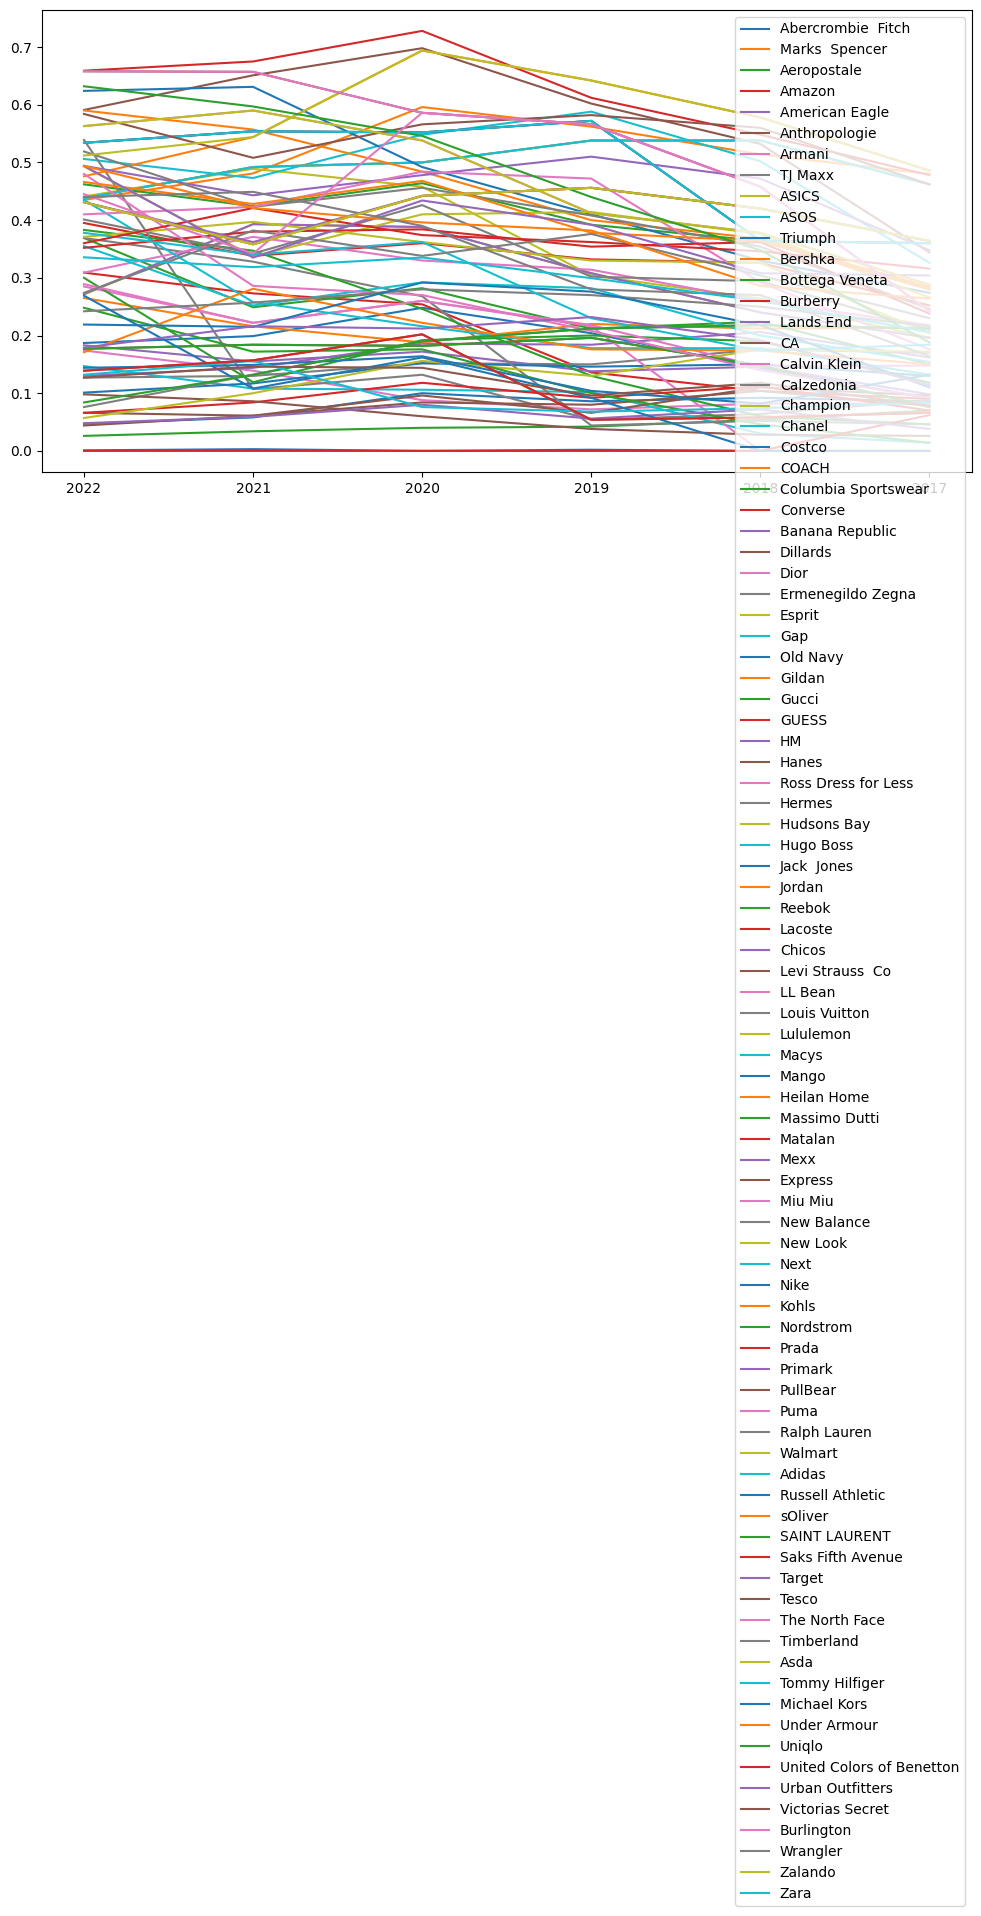

In [16]:
plt.figure(figsize=(12,6))
for col in data.columns:
    plt.plot(data.index, data[col], label=col)
plt.legend()
plt.show()


In [17]:
from statsmodels.tsa.api import VAR
model = VAR(df)
model_fit = model.fit()


/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [18]:
forecast = model_fit.forecast(model_fit.endog, steps=6)
forecast_df = pd.DataFrame(forecast, index=range(2023, 2029), columns=df.columns)

merged_df = pd.concat([df, forecast_df])

merged_df = merged_df.round(2)

merged_df.head(12)

,Abercrombie & Fitch,Marks & Spencer,Aeropostale,Amazon,American Eagle,Anthropologie,Armani,TJ Maxx,ASICS,ASOS,...,Michael Kors,Under Armour,Uniqlo,United Colors of Benetton,Urban Outfitters,Victoria's Secret,Burlington,Wrangler,Zalando,Zara
2017,0.09,0.48,0.07,0.09,0.10,0.07,0.08,0.17,0.20,0.33,...,0.11,0.26,0.19,0.07,0.11,0.08,0.24,0.16,0.36,0.21
2018,0.14,0.51,0.05,0.10,0.15,0.06,0.08,0.18,0.26,0.50,...,0.22,0.29,0.35,0.06,0.19,0.12,0.46,0.27,0.42,0.26
2019,0.20,0.56,0.04,0.14,0.14,0.05,0.07,0.15,0.30,0.59,...,0.28,0.38,0.44,0.05,0.23,0.10,0.57,0.28,0.46,0.30
2020,0.25,0.60,0.04,0.25,0.17,0.20,0.09,0.15,0.46,0.55,...,0.29,0.40,0.55,0.20,0.21,0.14,0.59,0.39,0.44,0.34
2021,0.20,0.48,0.03,0.27,0.16,0.16,0.14,0.13,0.49,0.47,...,0.22,0.42,0.60,0.16,0.22,0.15,0.34,0.45,0.36,0.32
2022,0.19,0.44,0.03,0.31,0.18,0.14,0.17,0.13,0.44,0.51,...,0.22,0.49,0.63,0.14,0.18,0.13,0.44,0.44,0.43,0.34
2023,0.18,0.41,0.02,0.31,0.17,0.15,0.17,0.12,0.47,0.45,...,0.19,0.46,0.63,0.15,0.18,0.14,0.33,0.46,0.36,0.32
2024,0.16,0.37,0.02,0.32,0.17,0.13,0.19,0.11,0.44,0.45,...,0.18,0.48,0.63,0.13,0.16,0.13,0.35,0.45,0.38,0.32
2025,0.16,0.36,0.02,0.31,0.17,0.13,0.18,0.11,0.44,0.43,...,0.17,0.47,0.61,0.13,0.16,0.12,0.32,0.44,0.36,0.31
2026,0.15,0.35,0.02,0.30,0.17,0.12,0.18,0.11,0.42,0.43,...,0.17,0.46,0.60,0.12,0.16,0.12,0.32,0.43,0.36,0.30


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming forecast_df contains the forecasted values and df contains the actual values

# Calculate the evaluation metrics for each variable
evaluation_metrics = {}
for column in df.columns:
    actual = df[column].values
    predicted = forecast_df[column].values

    mae = mean_absolute_error(actual, predicted)
    rmse = mean_squared_error(actual, predicted, squared=False)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100

    evaluation_metrics[column] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

metrics_df = pd.DataFrame(evaluation_metrics)

# Display the DataFrame
print(metrics_df)

# Display the evaluation metrics
for column, metrics in evaluation_metrics.items():
    print(f"Variable: {column}")
    print(f"MAE: {metrics['MAE']}")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"MAPE: {metrics['MAPE']}")
    print("------------------------")


      Abercrombie & Fitch  Marks & Spencer  Aeropostale      Amazon  \
MAE              0.055392         0.146550     0.022311    0.115358   
RMSE             0.061665         0.158782     0.025946    0.144920   
MAPE            35.744338        27.808648    45.710081  101.296920   

      American Eagle  Anthropologie     Armani    TJ Maxx      ASICS  \
MAE         0.026665       0.062108   0.072616   0.040664   0.122714   
RMSE        0.033934       0.066710   0.082739   0.043677   0.150015   
MAPE       21.667824      79.557752  87.135931  26.055150  47.416903   

           ASOS  ...  Michael Kors  Under Armour     Uniqlo  \
MAE    0.098157  ...      0.072707      0.103091   0.168800   
RMSE   0.105587  ...      0.079256      0.123559   0.227366   
MAPE  20.728867  ...     35.509802     33.009296  62.528034   

      United Colors of Benetton  Urban Outfitters  Victoria's Secret  \
MAE                    0.062108          0.050409           0.025776   
RMSE                   0.0667

/tmp/ipykernel_113/2852801850.py:9: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100
/tmp/ipykernel_113/2852801850.py:9: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100
/tmp/ipykernel_113/2852801850.py:9: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100
/tmp/ipykernel_113/2852801850.py:9: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100


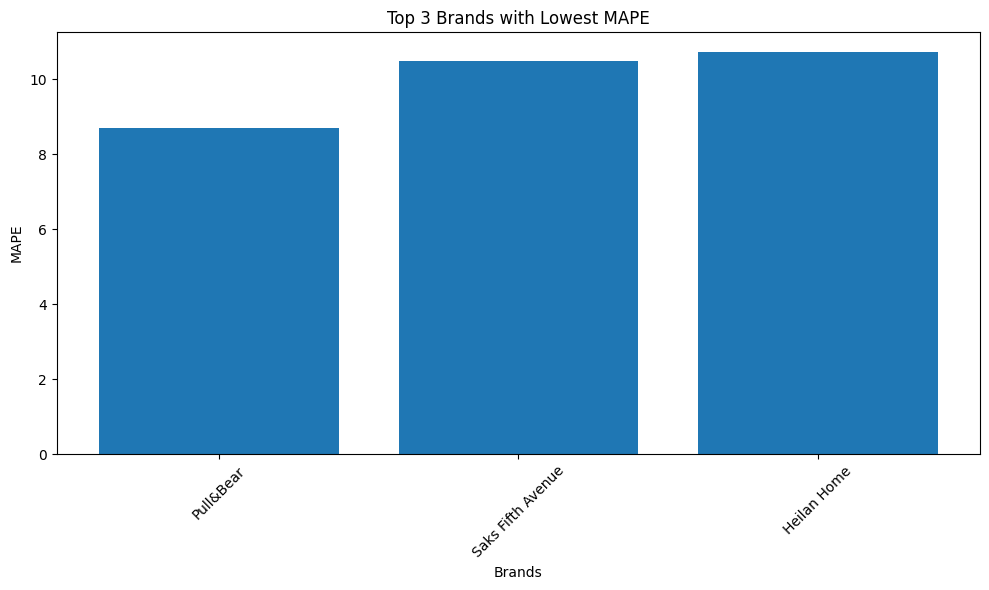

In [20]:

# Calculate the evaluation metrics for each variable
evaluation_metrics = {'Variable': [], 'MAE': [], 'RMSE': [], 'MAPE': []}
for column in df.columns:
    actual = df[column].values
    predicted = forecast_df[column].values

    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100

    evaluation_metrics['Variable'].append(column)
    evaluation_metrics['MAE'].append(mae)
    evaluation_metrics['RMSE'].append(rmse)
    evaluation_metrics['MAPE'].append(mape)

# Create a DataFrame from the evaluation metrics
metrics_df = pd.DataFrame(evaluation_metrics)

# Sort the DataFrame by MAPE in ascending order and select the top 5 variables
top_3_variables = metrics_df.sort_values(by='MAPE').head(3)

# Create a bar plot to visualize the top 5 variables
plt.figure(figsize=(10, 6))
plt.bar(top_3_variables['Variable'], top_3_variables['MAPE'])
plt.xlabel('Brands')
plt.ylabel('MAPE')
plt.title('Top 3 Brands with Lowest MAPE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


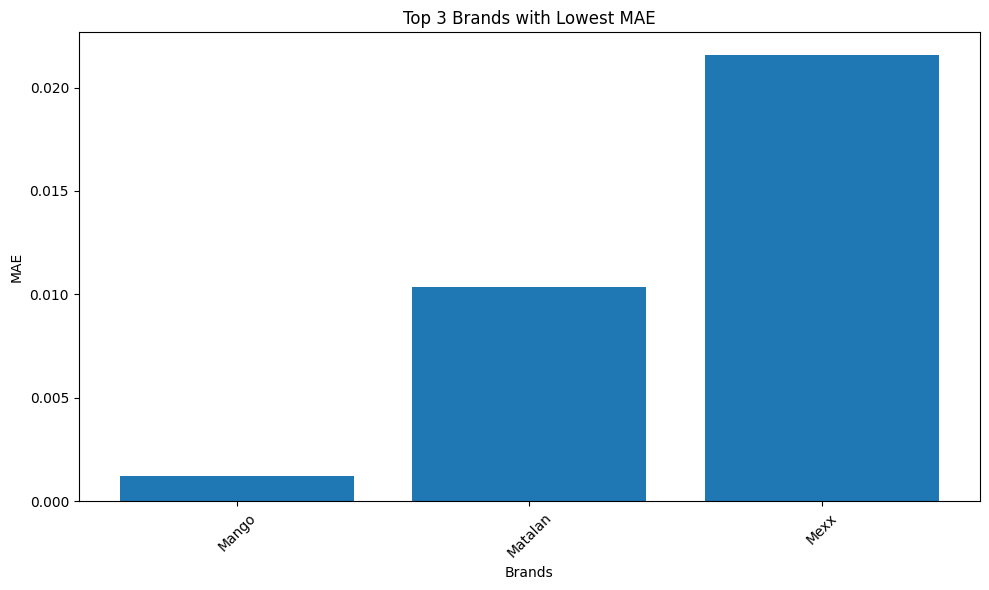

In [21]:
top_3_variables = metrics_df.sort_values(by='MAE').head(3)

# Create a bar plot to visualize the top 5 variables
plt.figure(figsize=(10, 6))
plt.bar(top_3_variables['Variable'], top_3_variables['MAE'])
plt.xlabel('Brands')
plt.ylabel('MAE')
plt.title('Top 3 Brands with Lowest MAE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

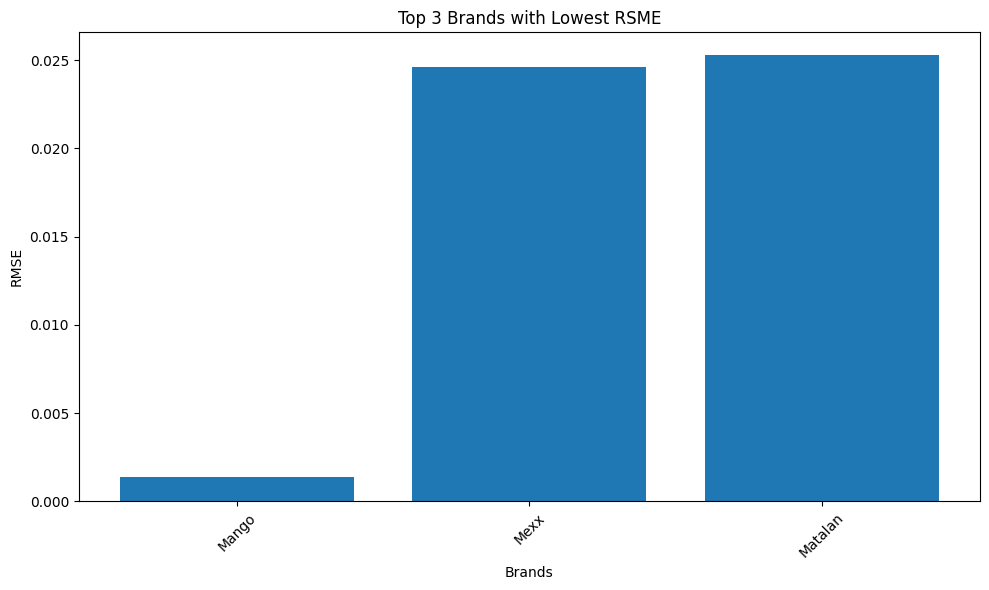

In [22]:
top_3_variables = metrics_df.sort_values(by='RMSE').head(3)

plt.figure(figsize=(10, 6))
plt.bar(top_3_variables['Variable'], top_3_variables['RMSE'])
plt.xlabel('Brands')
plt.ylabel('RMSE')
plt.title('Top 3 Brands with Lowest RSME')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
metrics_df

,Variable,MAE,RMSE,MAPE
0,Abercrombie & Fitch,0.055392,0.061665,35.744338
1,Marks & Spencer,0.146550,0.158782,27.808648
2,Aeropostale,0.022311,0.025946,45.710081
3,Amazon,0.115358,0.144920,101.296920
4,American Eagle,0.026665,0.033934,21.667824
...,...,...,...,...
86,Victoria's Secret,0.025776,0.030555,25.463776
87,Burlington,0.143200,0.166587,30.824667
88,Wrangler,0.121463,0.157321,54.403400
89,Zalando,0.047147,0.059833,10.711950


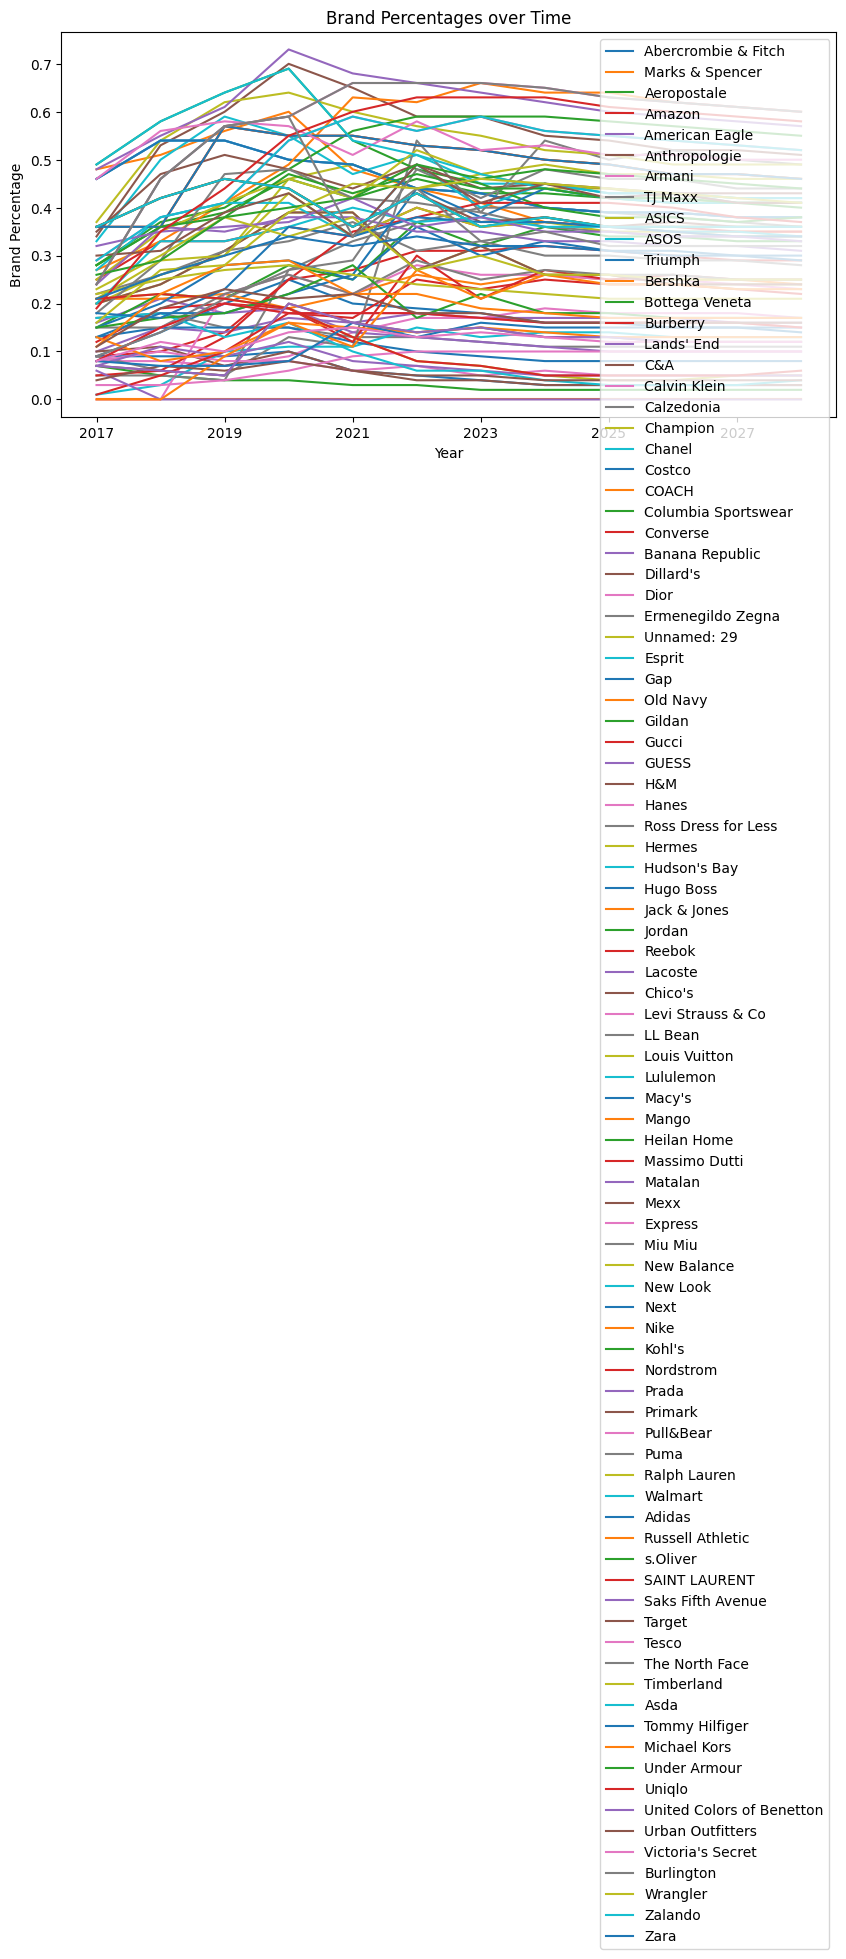

In [24]:
merged_df.plot(figsize=(10, 5))

plt.title('Brand Percentages over Time')
plt.xlabel('Year')
plt.ylabel('Brand Percentage')
 
plt.show()

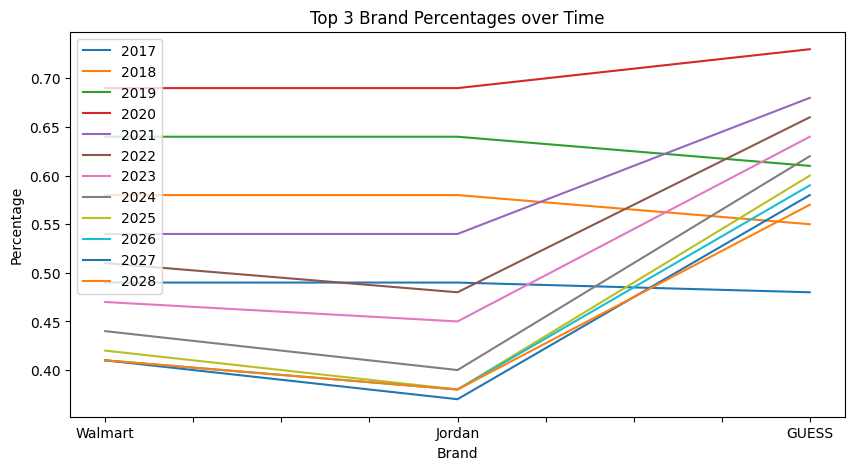

In [25]:
transposed_df = merged_df.T

top3_columns = transposed_df.nlargest(3, transposed_df.columns)

top3_columns.plot(figsize=(10, 5))

plt.title('Top 3 Brand Percentages over Time')
plt.xlabel('Brand')
plt.ylabel('Percentage')

plt.show()

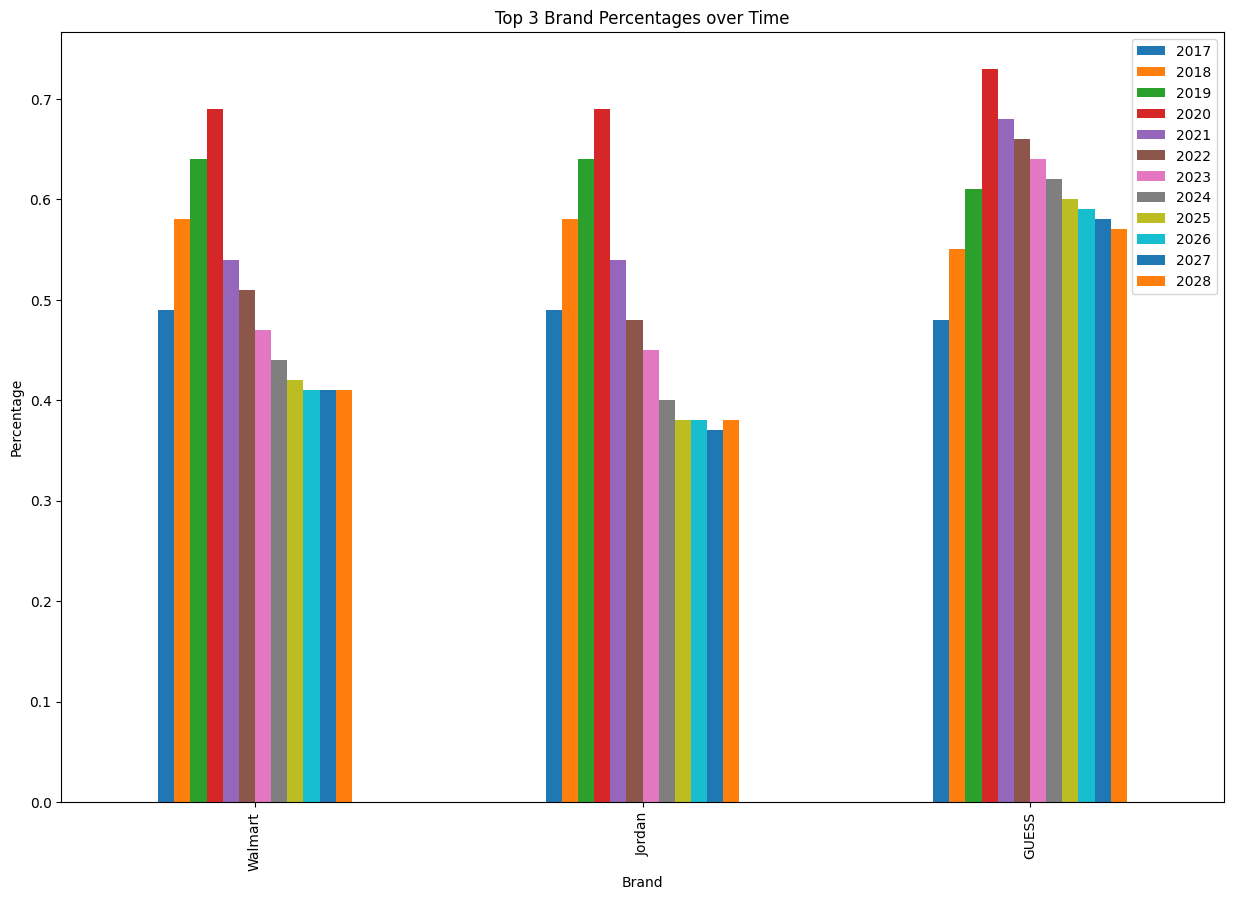

In [26]:
top3_columns.plot.bar(figsize=(15, 10))

plt.title('Top 3 Brand Percentages over Time')
plt.xlabel('Brand')
plt.ylabel('Percentage')

plt.show()

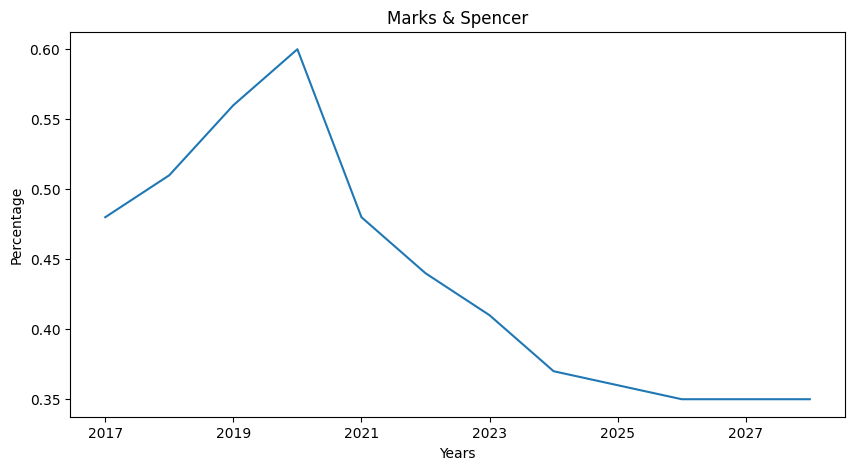

In [27]:
to = merged_df["Marks & Spencer"]

to.plot(figsize=(10, 5))

plt.title('Marks & Spencer')
plt.xlabel('Years')
plt.ylabel('Percentage')

plt.show()

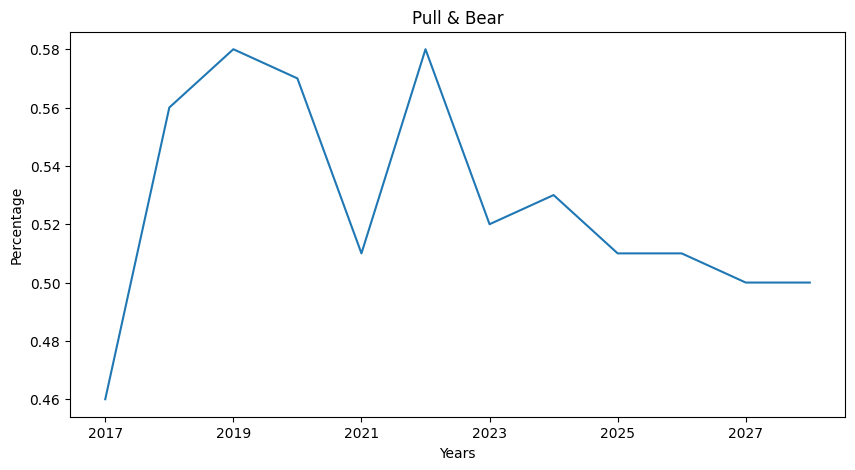

In [28]:
to = merged_df["Pull&Bear"]

to.plot(figsize=(10, 5))

plt.title('Pull & Bear')
plt.xlabel('Years')
plt.ylabel('Percentage')

plt.show()

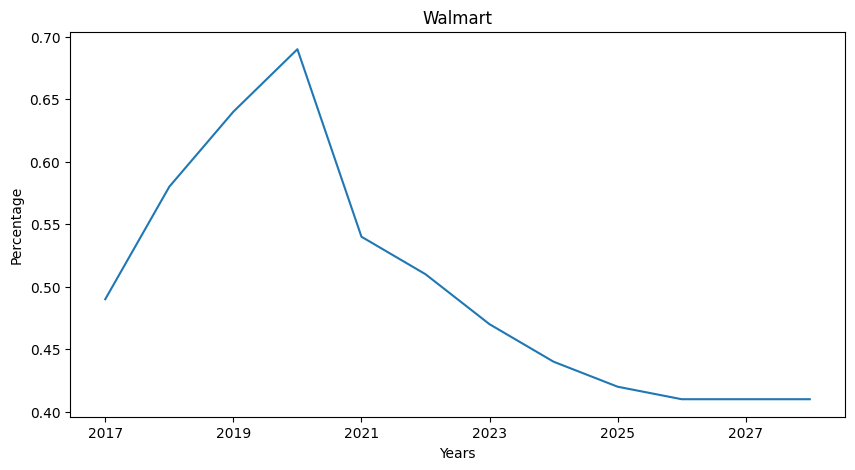

In [29]:
to = merged_df.Walmart

to.plot(figsize=(10, 5))

plt.title('Walmart')
plt.xlabel('Years')
plt.ylabel('Percentage')

plt.show()

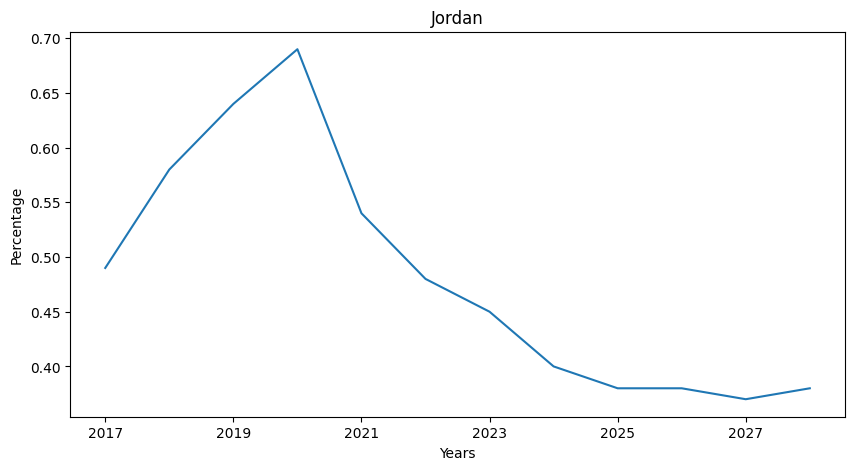

In [30]:
to = merged_df.Jordan

to.plot(figsize=(10, 5))

plt.title('Jordan')
plt.xlabel('Years')
plt.ylabel('Percentage')

plt.show()

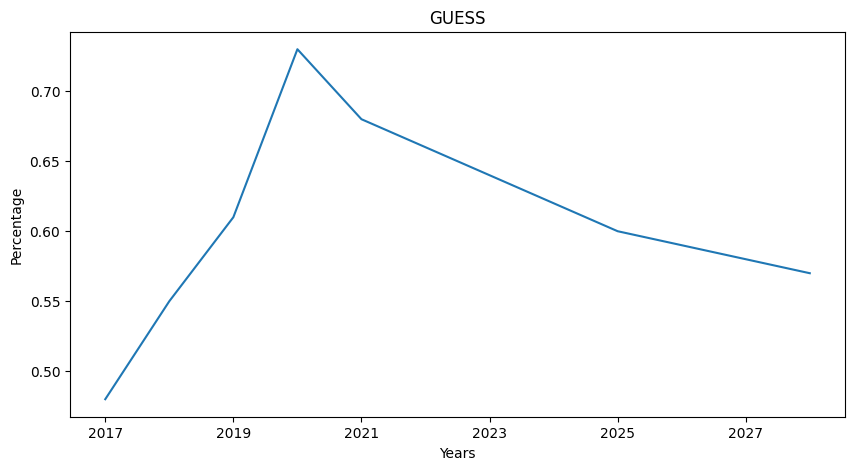

In [31]:
to = merged_df.GUESS

to.plot(figsize=(10, 5))

plt.title('GUESS')
plt.xlabel('Years')
plt.ylabel('Percentage')

plt.show()

In [32]:
df.columns

Index(['Abercrombie & Fitch', 'Marks & Spencer', 'Aeropostale', 'Amazon',
       'American Eagle', 'Anthropologie', 'Armani', 'TJ Maxx', 'ASICS', 'ASOS',
       'Triumph', 'Bershka', 'Bottega Veneta', 'Burberry', 'Lands' End', 'C&A',
       'Calvin Klein', 'Calzedonia', 'Champion', 'Chanel', 'Costco', 'COACH',
       'Columbia Sportswear', 'Converse', 'Banana Republic', 'Dillard's',
       'Dior', 'Ermenegildo Zegna', 'Unnamed: 29', 'Esprit', 'Gap', 'Old Navy',
       'Gildan', 'Gucci', 'GUESS', 'H&M', 'Hanes', 'Ross Dress for Less',
       'Hermes', 'Hudson's Bay', 'Hugo Boss', 'Jack & Jones', 'Jordan',
       'Reebok', 'Lacoste', 'Chico's', 'Levi Strauss & Co', 'LL Bean',
       'Louis Vuitton', 'Lululemon', 'Macy's', 'Mango', 'Heilan Home',
       'Massimo Dutti', 'Matalan', 'Mexx', 'Express', 'Miu Miu', 'New Balance',
       'New Look', 'Next', 'Nike', 'Kohl's', 'Nordstrom', 'Prada', 'Primark',
       'Pull&Bear', 'Puma', 'Ralph Lauren', 'Walmart', 'Adidas',
       'Russell Athleti

In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression

X = merged_df[['Abercrombie & Fitch', 'Marks & Spencer', 'Aeropostale', 'Amazon',
       'American Eagle', 'Anthropologie', 'Armani', 'TJ Maxx', 'ASICS', 'ASOS',
       'Triumph', 'Bershka', 'Bottega Veneta', 'Burberry', "Lands' End", 'C&A',
       'Calvin Klein', 'Calzedonia', 'Champion', 'Chanel', 'Costco', 'COACH',
       'Columbia Sportswear', 'Converse', 'Banana Republic', "Dillard's",
       'Dior', 'Ermenegildo Zegna', 'Unnamed: 29', 'Esprit', 'Gap', 'Old Navy',
       'Gildan', 'Gucci', 'GUESS', 'H&M', 'Hanes', 'Ross Dress for Less',
       'Hermes', "Hudson's Bay", "Hugo Boss", "Jack & Jones", 'Jordan',
       'Reebok', 'Lacoste', "Chico's", "Levi Strauss & Co", 'LL Bean',
       'Louis Vuitton', 'Lululemon', "Macy's", 'Mango', 'Heilan Home',
       'Massimo Dutti', 'Matalan', 'Mexx', 'Express', 'Miu Miu', 'New Balance',
       'New Look', 'Next', 'Nike', "Kohl's", "Nordstrom", "Prada", "Primark",
       'Pull&Bear', 'Puma', 'Ralph Lauren', 'Walmart', 'Adidas',
       'Russell Athletic', 's.Oliver', 'SAINT LAURENT', 'Saks Fifth Avenue',
       'Target', 'Tesco', 'The North Face', 'Timberland', 'Asda',
       'Tommy Hilfiger', 'Michael Kors', 'Under Armour', 'Uniqlo',
       'United Colors of Benetton', 'Urban Outfitters', "Victoria's Secret",
       'Burlington', 'Wrangler', 'Zalando', 'Zara']]  
y = merged_df.index 

model = LinearRegression()

model.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

predictions = model.predict(X)

merged_df['Predictions'] = predictions

print(merged_df)


Intercept: 2067.6617771096694
Coefficients: [  4.82968012  -9.57648519   0.43617974  -2.20687326  -7.13527239
   9.19720059  -3.63501205  -5.39424862   7.41923795  -1.7519224
  -1.7638044    5.07370724 -10.1149783    0.87059693 -15.90565829
   4.18127482  -2.93963853  -0.14353741  -9.82171122   8.59308245
   1.65144433  -9.85620877  -1.6231962   -8.81607032 -11.81185725
  -9.74798753   7.92414533   2.07654882  -4.58420043 -11.81185725
 -11.81185725  -3.32654563   2.03490162  -2.39005787 -13.19664157
  -9.82171122  -4.04945427   0.52025676   1.76375119  -8.70285141
   0.38965373  -8.81607032   2.91958149 -14.01393953   3.98677062
   0.97770408  19.86253649   3.63957036  10.85516431  -5.05436316
   6.12715578   0.           5.07370724  -5.94099888  -4.72167687
   1.50434871   5.79556433  21.72876647   2.30334135  -1.11153411
  -8.81607032   5.27449918   4.66429977   5.79556433  -8.90231267
  -6.74263538 -11.7593486   -0.08829553   9.78890152 -14.79320172
   3.71387581   3.7512638    8.24

In [34]:
mae = mean_absolute_error(y, predictions)

rmse = mean_squared_error(y, predictions, squared=False)

print('MAE:', mae)
print('RMSE:', rmse)

MAE: 0.0
RMSE: 0.0


In [35]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X, y)

predictions = model.predict(X)

merged_df['Predictions'] = predictions

print(merged_df)

      Abercrombie & Fitch  Marks & Spencer  Aeropostale  Amazon  \
2017                 0.09             0.48         0.07    0.09   
2018                 0.14             0.51         0.05    0.10   
2019                 0.20             0.56         0.04    0.14   
2020                 0.25             0.60         0.04    0.25   
2021                 0.20             0.48         0.03    0.27   
2022                 0.19             0.44         0.03    0.31   
2023                 0.18             0.41         0.02    0.31   
2024                 0.16             0.37         0.02    0.32   
2025                 0.16             0.36         0.02    0.31   
2026                 0.15             0.35         0.02    0.30   
2027                 0.15             0.35         0.02    0.29   
2028                 0.15             0.35         0.02    0.29   

      American Eagle  Anthropologie  Armani  TJ Maxx  ASICS  ASOS  ...  \
2017            0.10           0.07    0.08     0.17  

In [36]:
mae = mean_absolute_error(y, predictions)

rmse = mean_squared_error(y, predictions, squared=False)

print('MAE:', mae)
print('RMSE:', rmse)

MAE: 0.3708333333333371
RMSE: 0.6136299101793183


In [37]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', random_state=42)

# Fit the model to the data
model.fit(X, y)

# Perform prediction on the merged dataframe
predictions = model.predict(X)

# Add the predictions as a new column in the merged dataframe
merged_df['Predictions'] = predictions

# Display the updated merged dataframe
print(merged_df)

      Abercrombie & Fitch  Marks & Spencer  Aeropostale  Amazon  \
2017                 0.09             0.48         0.07    0.09   
2018                 0.14             0.51         0.05    0.10   
2019                 0.20             0.56         0.04    0.14   
2020                 0.25             0.60         0.04    0.25   
2021                 0.20             0.48         0.03    0.27   
2022                 0.19             0.44         0.03    0.31   
2023                 0.18             0.41         0.02    0.31   
2024                 0.16             0.37         0.02    0.32   
2025                 0.16             0.36         0.02    0.31   
2026                 0.15             0.35         0.02    0.30   
2027                 0.15             0.35         0.02    0.29   
2028                 0.15             0.35         0.02    0.29   

      American Eagle  Anthropologie  Armani  TJ Maxx  ASICS  ASOS  ...  \
2017            0.10           0.07    0.08     0.17  

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=97a17b22-c0e3-4897-9dc3-f4ac06537e05' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>